### Arbitrary Imputer : Fill missing value by put any value (use this,When Data is not randomly missing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("/home/yash/Downloads/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().sum(),"Percentage of Missing Value",df.isnull().mean()*100
# missing value of each collumn 

(Age         177
 Fare         45
 Family        0
 Survived      0
 dtype: int64,
 'Percentage of Missing Value',
 Age         19.865320
 Fare         5.050505
 Family       0.000000
 Survived     0.000000
 dtype: float64)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = "Survived"),df["Survived"],train_size = 0.8,random_state = 0)

In [6]:
x_train["Age_99"] = x_train["Age"].fillna(99)
x_train["Age_-1"] = x_train["Age"].fillna(-1)

x_train["Fare_999"] = x_train["Fare"].fillna(999)
x_train["Fare_-1"] = x_train["Fare"].fillna(-1)

In [7]:
x_train.head(7)

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
140,NaN,15.2458,2,99.0,-1.0,15.2458,15.2458
439,31.0,10.5000,0,31.0,31.0,10.5000,10.5000
817,31.0,37.0042,2,31.0,31.0,37.0042,37.0042
378,20.0,NaN,0,20.0,20.0,999.0000,-1.0000
491,21.0,7.2500,0,21.0,21.0,7.2500,7.2500
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
588,22.0,8.0500,0,22.0,22.0,8.0500,8.0500


In [8]:
print("Original Age Variable Variance : ",x_train["Age"].var())
print("Age Variance After 99 wala Imputer : ",x_train["Age_99"].var())
print("Age Variance After -1 wala Imputer : ",x_train["Age_-1"].var(),"\n")

print("Original Fare Variable Variance : ",x_train["Fare"].var())
print("Fare Variance After 999 wala Imputer : ",x_train["Fare_999"].var())
print("Fare Variance After -1 wala Imputer : ",x_train["Fare_-1"].var())

Original Age Variable Variance :  213.7165085187578
Age Variance After 99 wala Imputer :  934.1249575238237
Age Variance After -1 wala Imputer :  321.6688109349075 

Original Fare Variable Variance :  2574.3526206637193
Fare Variance After 999 wala Imputer :  50926.922924304854
Fare Variance After -1 wala Imputer :  2489.2138573159036


<Axes: ylabel='Density'>

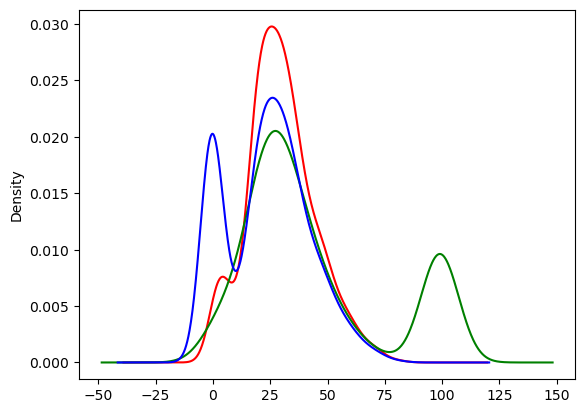

In [9]:
x_train["Age"].plot(kind = "kde",color = "Red")
x_train["Age_99"].plot(kind = "kde",color = "Green")
x_train["Age_-1"].plot(kind = "kde",color = "Blue")

<Axes: ylabel='Density'>

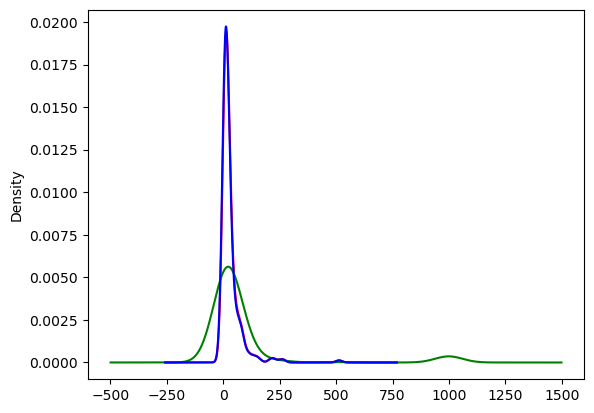

In [10]:
x_train["Fare"].plot(kind = "kde",color = "Red")
x_train["Fare_999"].plot(kind = "kde",color = "Green")
x_train["Fare_-1"].plot(kind = "kde",color = "Blue")

In [11]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
Age,1.000000,0.106334,-0.295318,1.000000,1.000000,0.025986,0.102325
Fare,0.106334,1.000000,0.198661,-0.031926,0.130702,1.000000,1.000000
Family,-0.295318,0.198661,1.000000,-0.108247,-0.166041,0.017799,0.197928
Age_99,1.000000,-0.031926,-0.108247,1.000000,-0.305206,-0.029388,-0.027373
Age_-1,1.000000,0.130702,-0.166041,-0.305206,1.000000,0.047373,0.123280
Fare_999,0.025986,1.000000,0.017799,-0.029388,0.047373,1.000000,0.069649
Fare_-1,0.102325,1.000000,0.197928,-0.027373,0.123280,0.069649,1.000000


## Using Sklearn

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = "Survived"),df["Survived"],train_size = 0.8,random_state = 0)

In [13]:
imputer1 = SimpleImputer(missing_values = np.nan,strategy = "constant",fill_value = 99)
imputer2 = SimpleImputer(missing_values = np.nan,strategy = "constant",fill_value = -1)

In [14]:
trf = ColumnTransformer([
    ("imputer1",imputer1,["Age"]),
    ("imputer2",imputer2,["Fare"])
],remainder = "passthrough")

In [15]:
trf.fit(x_train)

/home/yash/anaconda3/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [16]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)